In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (16, 3)

In [2]:
import sys
import os
import time
import numpy as np
import tensorflow as tf
import gpflow
import soundfile
import pickle
sys.path.append('../../../../../')
import gpitch
from gpitch.amtgp import logistic
from gpitch import myplots
import soundfile
import peakutils
from scipy import signal
from scipy.fftpack import fft, ifft, ifftshift
from scipy import signal

In [3]:
visible_device = sys.argv[1]  # configure gpu usage
gpitch.amtgp.init_settings(visible_device=visible_device, interactive=False)

In [4]:
pickleloc = '../../../../../../results/files/svi/script/loo88/loo2/'  # location saved models
filename = '../../../../../../datasets/maps/test_data/MAPS_MUS-bach_846_AkPnBcht_mono.wav'  # loc test dat
bounds = [21, 109]  # pitches to detect
midi = np.asarray([str(i) for i in range(bounds[0], bounds[1])]).reshape(-1,)  # list
Np = midi.size
fs = 16e3
#'../../../../../../results/files/svi/script/loo88/100.p'

In [5]:

# models = [pickle.load(open(pickleloc +"prediction_pitch_"+ midi[i] + ".p", "rb"))
#           for i in range(Np)]

models = [pickle.load(open(pickleloc +"prediction_pitch_15_secs"+ midi[i] + ".p", "rb"))
          for i in range(Np)]

In [6]:
y, fs = soundfile.read(filename)
y = y.reshape(-1, 1)
Ntest = y.size
x = np.linspace(0, (Ntest-1.)/fs, Ntest).reshape(-1, 1)

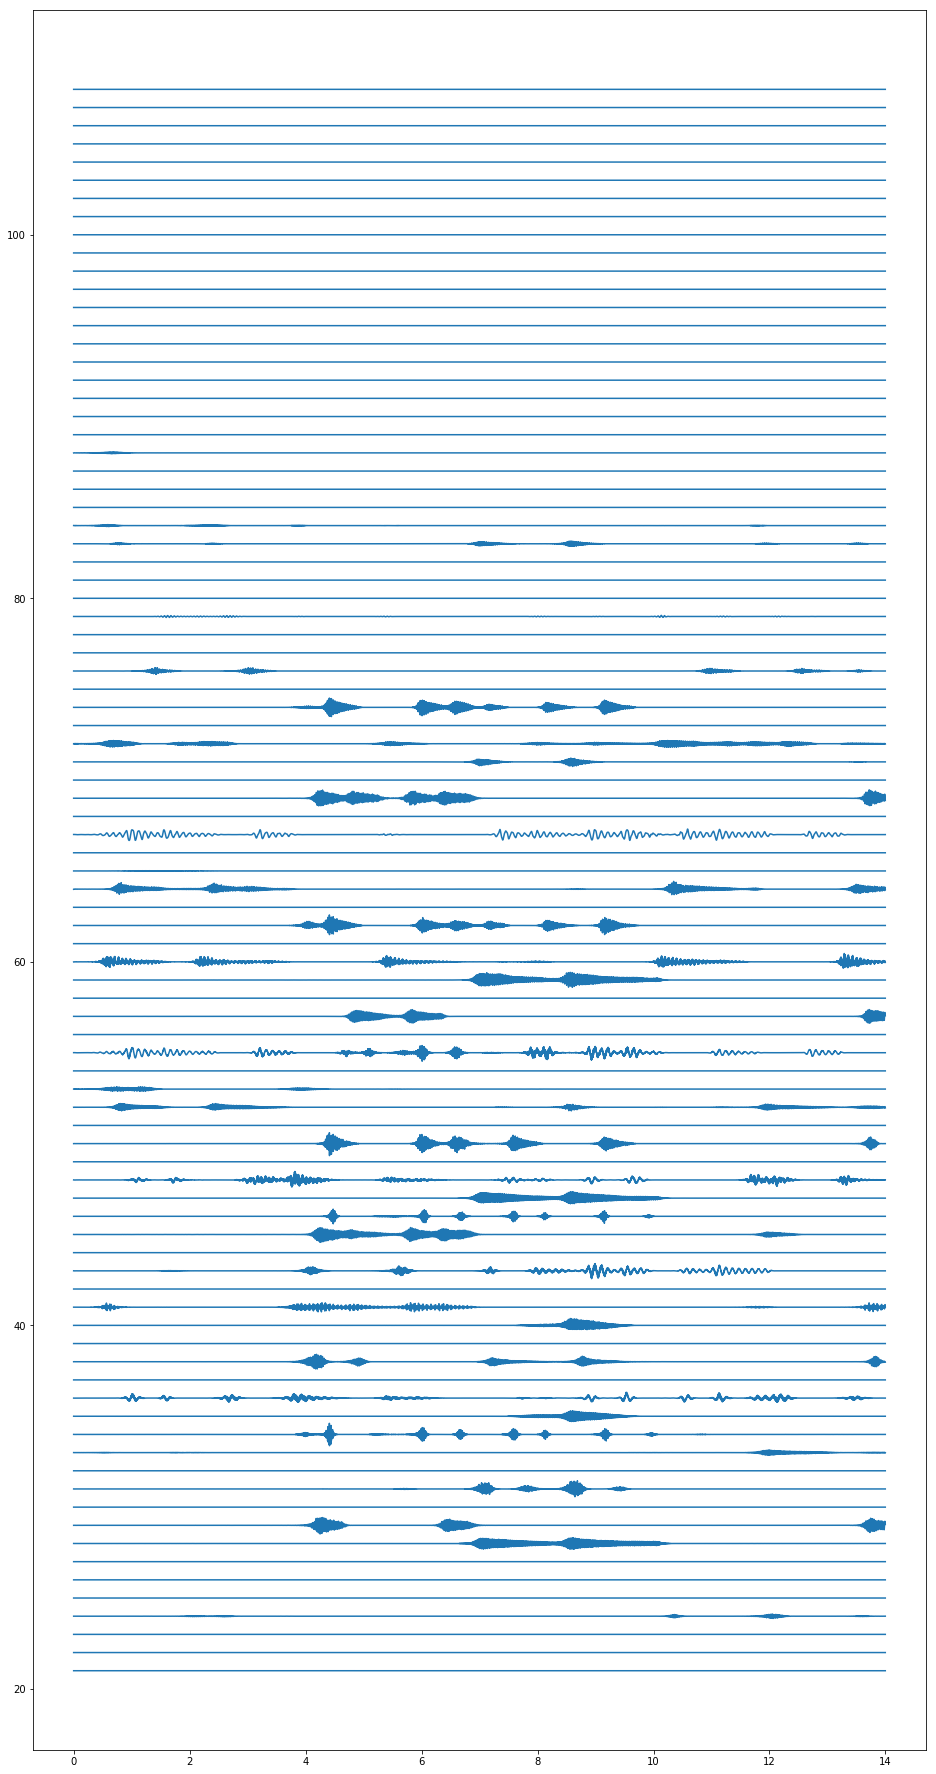

In [7]:
plt.figure(figsize=(16, 32))
pr = np.zeros((88, 5600))
pr_act = np.zeros((88, 5600))
for i in range(88):
    com_pitch = models[i][0][0].copy()
    act_pitch = logistic(models[i][2][0].copy())
    sou_pitch = act_pitch * com_pitch
    pr[i, :] = sou_pitch
    pr_act[i, :] = act_pitch
    plt.plot(x[::40], int(midi[i]) + sou_pitch, 'C0')
    #plt.ylim([-1, 1])
plt.savefig('first_pr_ever.eps')

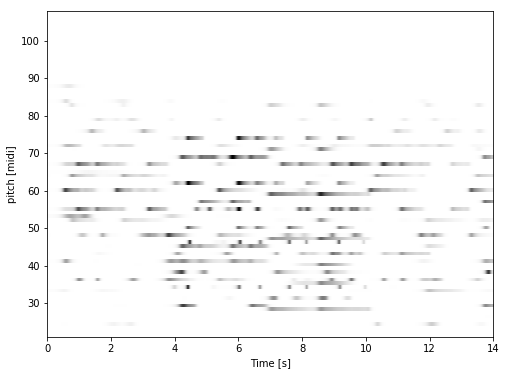

In [8]:
plt.figure(figsize=(8, 6))
plt.imshow(pr_act, origin='lower', cmap='binary', extent=(0, x[-1], 21, 108))
plt.axis('tight')
plt.ylabel('pitch [midi]')
plt.xlabel('Time [s]');

In [9]:
from mir_eval import display
import pandas

In [10]:
ell = '../../../../../../datasets/maps/test_data/MAPS_MUS-bach_846_AkPnBcht.txt'  # event list location

In [11]:
midi_data = pandas.read_csv(ell, delim_whitespace=True)

In [12]:
midi_data

,OnsetTime,OffsetTime,MidiPitch
0,0.501694,2.11932,60
1,0.704402,2.32203,64
2,0.907110,1.51120,67
3,1.109820,1.71391,72
4,1.312490,1.91661,76
5,1.511200,2.52474,67
6,1.713910,2.72745,72
7,1.916610,2.93015,76
8,2.119320,3.73286,60
9,2.322030,3.74807,64


In [13]:
midi_array = midi_data.as_matrix()
print midi_array

[[   0.501694    2.11932    60.      ]
 [   0.704402    2.32203    64.      ]
 [   0.90711     1.5112     67.      ]
 ..., 
 [ 221.534     226.059      79.      ]
 [ 221.534     226.059      84.      ]
 [ 221.534     226.059      76.      ]]


In [14]:
intervals = midi_array[:, 0:2].copy()
print intervals.shape
midi = midi_array[:,2].copy()
print midi.shape

(1282, 2)
(1282,)


(0, 14)

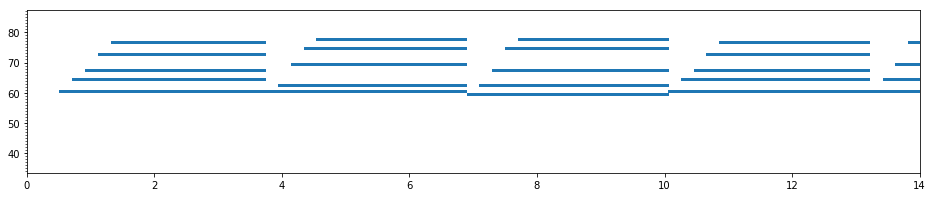

In [15]:
# n = 3
# intervals = np.zeros((n, 2)).reshape(-1, 2)
# intervals[0, 0] = 0.
# intervals[0, 1] = 1.
# intervals[1, 0] = 2.
# intervals[1, 1] = 3.
# intervals[2, 0] = 10.
# intervals[2, 1] = 12.

# midi = np.zeros((n,)).reshape(-1,)
# midi[0] = 0.
# midi[1] = 1.
# midi[2] = 3.


ax = display.piano_roll(intervals=intervals, midi=midi)
ax.set_xlim(0, 14)

In [16]:
onsets = midi_array[:, 0:1].copy()
offsets = midi_array[:, 1:2].copy()

In [17]:
def piano_roll(onsets, offsets, midi, time_vector):
    pr = np.zeros((110, time_vector.size))
    for i in range(midi.size):
        row = int(midi[i])
        a = np.argmin(np.abs(onsets[i] - time_vector))
        b = np.argmin(np.abs(offsets[i] - time_vector))
        pr[row, a:b] = 1 
    return pr

In [18]:
pr_gt = piano_roll(onsets=onsets, offsets=offsets, midi=midi, time_vector=x)

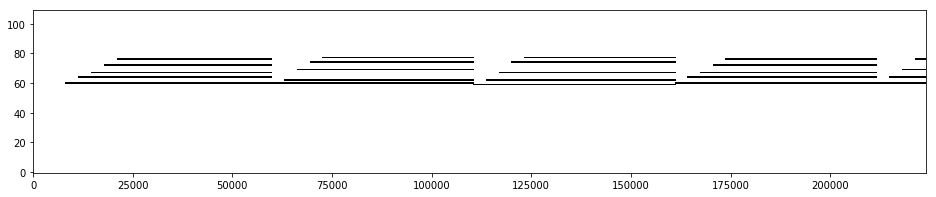

In [19]:
plt.imshow(pr_gt, aspect='auto', cmap='binary', origin='zeros')
#plt.ylim([21, 108])

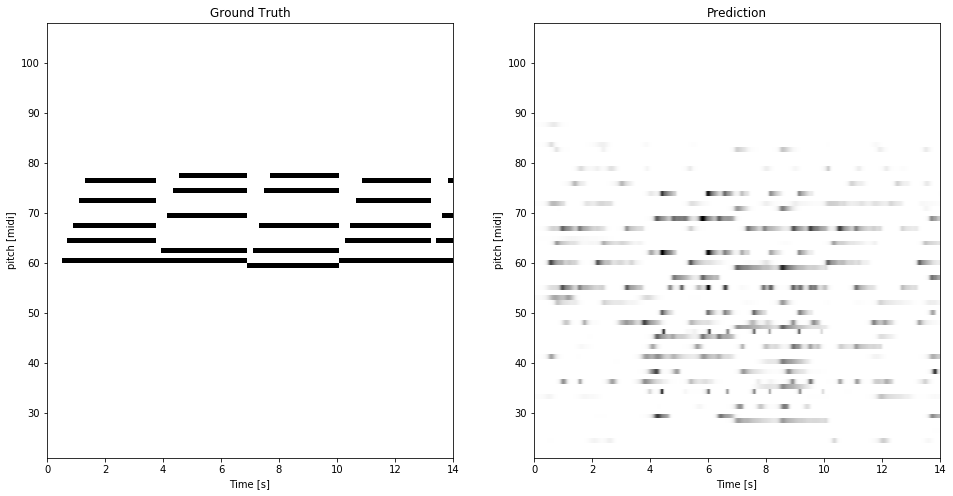

In [22]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(pr_gt, origin='zeros', cmap='binary', extent=(0, x[-1], 0, 110))
plt.axis('tight')
plt.title('Ground Truth')
plt.ylabel('pitch [midi]')
plt.xlabel('Time [s]')
plt.ylim([21, 108])
#plt.grid()

plt.subplot(1, 2, 2)
plt.imshow(pr_act, origin='zeros', cmap='binary', extent=(0, x[-1], 21, 108))
plt.axis('tight')
plt.title('Prediction')
plt.ylabel('pitch [midi]')
plt.xlabel('Time [s]')
#plt.grid()
plt.savefig('../../../../../../../../../Desktop/ground_truth_and_prediction.pdf')